In [17]:
import pandas as pd
import numpy as np


In [18]:
import matplotlib.pyplot as plt


In [19]:
data=pd.read_csv('StudentsPerformance_modified.csv')

In [20]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72.0,74.0
1,female,group C,some college,standard,completed,69,90.0,88.0
2,female,group B,master's degree,standard,none,90,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47,57.0,44.0
4,male,group C,some college,standard,none,76,78.0,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99.0,95.0
996,male,group C,high school,free/reduced,none,62,55.0,55.0
997,female,group C,high school,free/reduced,completed,59,71.0,65.0
998,female,group D,some college,standard,completed,68,78.0,77.0


In [21]:
data.isnull().sum()


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     8
reading score                  6
writing score                  9
dtype: int64

In [22]:
data=data.fillna(data.mean())
data.isnull().sum()

/tmp/ipykernel_3033/555562392.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data=data.fillna(data.mean())


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     8
reading score                  0
writing score                  0
dtype: int64

In [23]:
data.replace('?', 0, inplace = True)


In [24]:
data['math score']=data['math score'].astype('float')
data['reading score']=data['reading score'].astype('float')


In [25]:
data['math score'].fillna(data[['reading score', 'writing score']].mean(axis=1), inplace = True)
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [26]:
data.describe()


,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,63.777244,68.008048,69.487386
std,21.770816,16.552339,29.430286
min,-89.000000,3.000000,10.000000
25%,54.000000,58.000000,58.000000
50%,65.000000,69.000000,69.000000
75%,76.000000,79.000000,79.000000
max,334.000000,100.000000,567.000000


In [27]:
q25, q75 = np.percentile(data['math score'], [25, 75])
iqr = q75 - q25
lower_bound = q25 - (1.5 * iqr)
upper_bound = q75 + (1.5 * iqr)
data = data[(data['math score'] >= lower_bound) & (data['math score'] <= upper_bound)]
data.describe()

,math score,reading score,writing score
count,958.000000,958.000000,958.000000
mean,66.043052,68.067900,69.689339
std,14.979517,16.486104,29.796189
min,22.000000,3.000000,15.000000
25%,57.000000,58.250000,58.000000
50%,66.000000,69.000000,69.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,567.000000


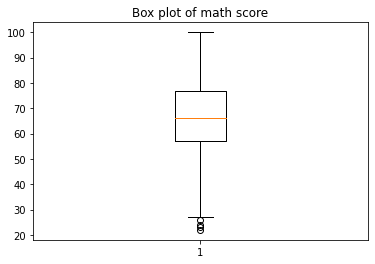

In [28]:
plt.boxplot(data['math score'])
plt.title('Box plot of math score')
plt.show()

In [29]:
data.describe()

,math score,reading score,writing score
count,958.000000,958.000000,958.000000
mean,66.043052,68.067900,69.689339
std,14.979517,16.486104,29.796189
min,22.000000,3.000000,15.000000
25%,57.000000,58.250000,58.000000
50%,66.000000,69.000000,69.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,567.000000


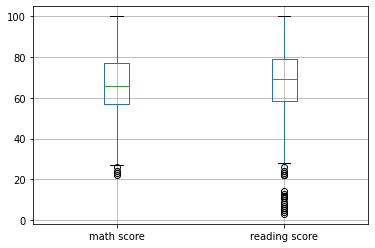

In [30]:
boxplot1=data.boxplot(column=['math score','reading score'])
plt.show()

In [31]:
data.shape

(958, 8)

In [32]:
data.dtypes


gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                     float64
reading score                  float64
writing score                  float64
dtype: object

In [33]:
df_norm = (data["math score"] - data["math score"].min()) / (data["math score"].max() - data["math score"].min())
df_norm

0      0.641026
1      0.602564
2      0.871795
3      0.320513
4      0.692308
         ...   
995    0.846154
996    0.512821
997    0.474359
998    0.589744
999    0.705128
Name: math score, Length: 958, dtype: float64

In [34]:
df_norm = (data["reading score"] - data["reading score"].min()) / (data["reading score"].max() - data["reading score"].min())
df_norm

0      0.711340
1      0.896907
2      0.948454
3      0.556701
4      0.773196
         ...   
995    0.989691
996    0.536082
997    0.701031
998    0.773196
999    0.855670
Name: reading score, Length: 958, dtype: float64

In [35]:
df_norm = (data["writing score"] - data["writing score"].min()) / (data["writing score"].max() - data["writing score"].min())
df_norm

0      0.106884
1      0.132246
2      0.141304
3      0.052536
4      0.108696
         ...   
995    0.144928
996    0.072464
997    0.090580
998    0.112319
999    0.128623
Name: writing score, Length: 958, dtype: float64

In [37]:
data


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0
4,male,group C,some college,standard,none,76.0,78.0,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.0,99.0,95.0
996,male,group C,high school,free/reduced,none,62.0,55.0,55.0
997,female,group C,high school,free/reduced,completed,59.0,71.0,65.0
998,female,group D,some college,standard,completed,68.0,78.0,77.0


In [38]:
data[['writing score minmax','math score minmax']] = (data[['writing score','math score']] - data[['writing score','math score']].min()) / (data[['writing score','math score']].max() - data[['writing score','math score']].min())
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,writing score minmax,math score minmax
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0,0.106884,0.641026
1,female,group C,some college,standard,completed,69.0,90.0,88.0,0.132246,0.602564
2,female,group B,master's degree,standard,none,90.0,95.0,93.0,0.141304,0.871795
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0,0.052536,0.320513
4,male,group C,some college,standard,none,76.0,78.0,75.0,0.108696,0.692308


In [39]:
data[['MS_Z','RS_Z','WS_Z']]=(data[['math score','reading score','writing score']] - data[['math score','reading score','writing score']].mean())/data[['math score','reading score','writing score']].std()
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,writing score minmax,math score minmax,MS_Z,RS_Z,WS_Z
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0,0.106884,0.641026,0.397673,0.238510,0.144672
1,female,group C,some college,standard,completed,69.0,90.0,88.0,0.132246,0.602564,0.197399,1.330339,0.614530
2,female,group B,master's degree,standard,none,90.0,95.0,93.0,0.141304,0.871795,1.599314,1.633624,0.782337
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0,0.052536,0.320513,-1.271273,-0.671347,-0.862169
4,male,group C,some college,standard,none,76.0,78.0,75.0,0.108696,0.692308,0.664704,0.602453,0.178233
